In [2]:
## Finding lane turtorial for Project teammates
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Some steps taken Finding Lane Detection
## 1) Reading the image 
## 2) Converting to grayscale

## 3) Smoothing or Removing some noise 

## 4) Finding Edges 




In [4]:
## 1) Reading the image 

img=cv2.imread('image/test_image.jpg')


In [5]:
## Converting to gray
img_copy=img.copy()
gray_img=cv2.cvtColor(img_copy,cv2.COLOR_RGB2GRAY)


In [6]:
## Visualising
## Matplotlib works on RGB while cv2 works on BGR channel

def convert2RGB(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Gray_IMAGE')

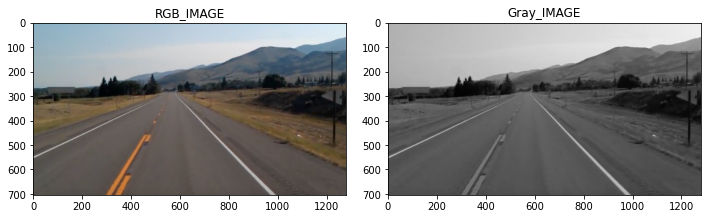

In [7]:
## Gray V/s RGB 

fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(img_copy))
axes[0].set_title("RGB_IMAGE")
axes[1].imshow(convert2RGB(gray_img))
axes[1].set_title("Gray_IMAGE")

Text(0.5, 1.0, 'Blur_Image')

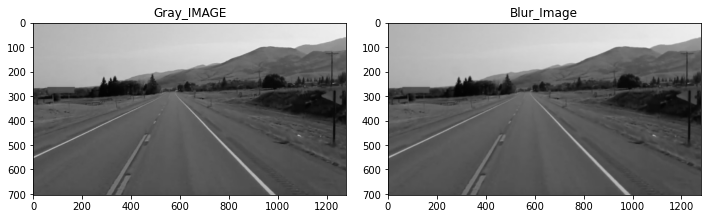

In [8]:
blur=cv2.GaussianBlur(gray_img,(5,5),0)

fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(gray_img))
axes[0].set_title("Gray_IMAGE")
axes[1].imshow(convert2RGB(blur))
axes[1].set_title("Blur_Image")


In [9]:
#plt.figure(figsize=(200,200))
#plt.imshow(convert2RGB(blur))

Text(0.5, 1.0, 'Canny')

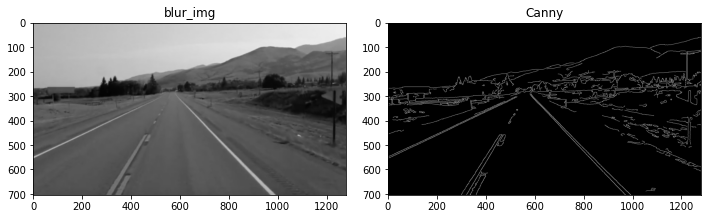

In [10]:
canny=cv2.Canny(blur,50,10)

fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(blur))
axes[0].set_title("blur_img")
axes[1].imshow(convert2RGB(canny))
axes[1].set_title("Canny")

In [11]:
## Putting step 1-4 inside a function
def canny(img_copy):
    gray_img=cv2.cvtColor(img_copy,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray_img,(5,5),0)
    canny=cv2.Canny(blur,50,10)
    return canny
    
    

In [12]:
canny=canny(img_copy)


Text(0.5, 1.0, 'Canny')

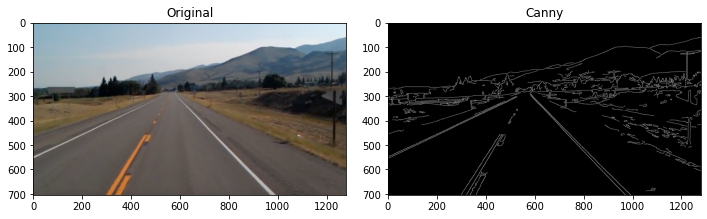

In [13]:
fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(img_copy))
axes[0].set_title("Original")
axes[1].imshow(convert2RGB(canny))
axes[1].set_title("Canny")

In [14]:
#plt.figure(figsize=(200,200))
#plt.imshow(convert2RGB(canny))

In [15]:
## Step 4 Region of intrest
## Step 5 Masked Region
## Step 6 Lane Image
height,width=canny.shape
roi=np.array([[(220,height),(1100,height),(550,200)]])
mask=np.zeros_like(canny)
masked_ROI=cv2.fillPoly(mask,roi,255)

Text(0.5, 1.0, 'masked_roi')

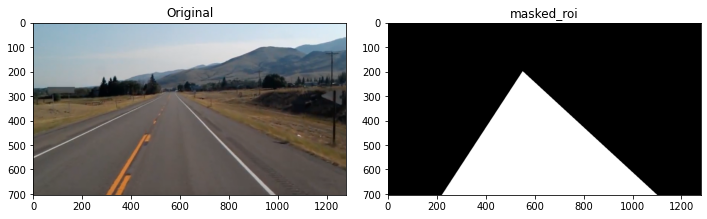

In [16]:
fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(img_copy))
axes[0].set_title("Original")
axes[1].imshow(convert2RGB(masked_ROI))
axes[1].set_title("masked_roi")

In [17]:
## Perfoming bitwise_and to get lanes part only 
lane_img=cv2.bitwise_and(mask,canny)


Text(0.5, 1.0, 'Lane_Image')

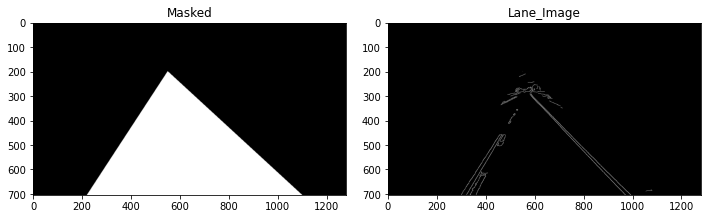

In [18]:
fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(masked_ROI))
axes[0].set_title("Masked")
axes[1].imshow(convert2RGB(lane_img))
axes[1].set_title("Lane_Image")

In [19]:
#plt.figure(figsize=(200,200))
#plt.imshow(convert2RGB(lane_img))

In [20]:
# Step 4 to 6 in one function
def findimageLane(canny):
    height,width=canny.shape
    roi=np.array([[(220,height),(1100,height),(550,200)]])
    mask=np.zeros_like(canny)
    masked_ROI=cv2.fillPoly(mask,roi,255)
    lane_img=cv2.bitwise_and(mask,canny)
    return lane_img
    
    
    


In [21]:
lane_img=findimageLane(canny)

Text(0.5, 1.0, 'Lane_Image')

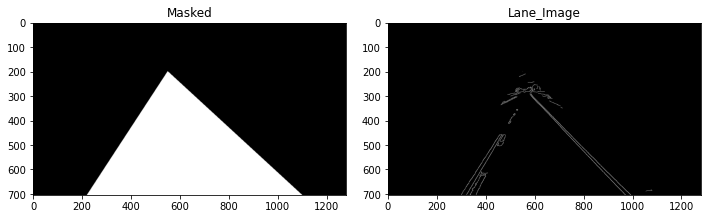

In [22]:
fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(masked_ROI))
axes[0].set_title("Masked")
axes[1].imshow(convert2RGB(lane_img))
axes[1].set_title("Lane_Image")

In [ ]:
### Finding the lanes from lane_img
## Computer cant see lines like we dp
## Simple technique yet effective 

## Using Hough Transform

## In simple words, Hough Trnasform deal with Hough space (either (m,b)or (P,theta)).
## Normal Points can be represent in HoughSpace as HoughLines
# HoughSpace itself is divided into no of different grids
## Only those (m,b) or (p,theta) are counted which have atleast minimum number of connected lines




In [23]:
lines=cv2.HoughLinesP(lane_img,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)

In [24]:
## Visualizing the lines 
img_zeroes_copy=np.zeros_like(img_copy)
if len(lines)>0:
    for line in lines:
        line=line.reshape(4)
        x1,y1,x2,y2=line
        cv2.line(img_zeroes_copy,(x1,y1),(x2,y2),(255,0,0),10)
cv2.imshow('',img_zeroes_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
        

In [25]:
## Mixing the original image with lines_images
RGB_IMG_WITH_LINE=cv2.addWeighted(img_copy,0.8,img_zeroes_copy,1,1)

Text(0.5, 1.0, 'image with lanes')

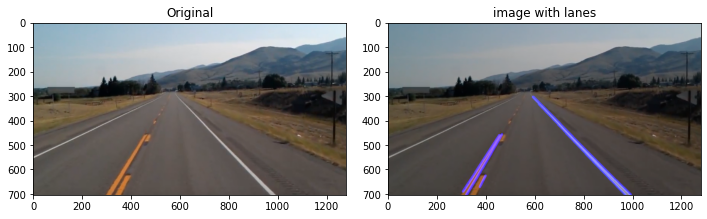

In [26]:
fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(img_copy))
axes[0].set_title("Original")
axes[1].imshow(convert2RGB(RGB_IMG_WITH_LINE))
axes[1].set_title("image with lanes")

In [27]:
## Optimizing the lines 
## clearly seen multiple  lines in images
def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

In [28]:
def optimized_lines(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return np.array(averaged_lines)

In [29]:
optimized_lines_=optimized_lines(img_copy,lines)

In [30]:
#Visualizing the optimized one
## Visualizing the lines 
img_zeroes_copy=np.zeros_like(img_copy)
if len(optimized_lines_)>0:
    for line in optimized_lines_:
        
        line=line[0].reshape(4)
        x1,y1,x2,y2=line
        cv2.line(img_zeroes_copy,(x1,y1),(x2,y2),(255,0,0),10)
cv2.imshow('',img_zeroes_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
        


In [31]:
## Mixing the original image with lines_images
RGB_IMG_WITH_LINE=cv2.addWeighted(img_copy,0.8,img_zeroes_copy,1,1)

Text(0.5, 1.0, 'image with Optimized lanes')

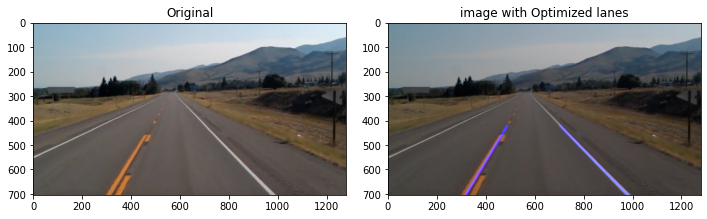

In [32]:
fig,axes=plt.subplots(1,2,figsize=(10,20))
fig.tight_layout()
axes[0].imshow(convert2RGB(img_copy))
axes[0].set_title("Original")
axes[1].imshow(convert2RGB(RGB_IMG_WITH_LINE))
axes[1].set_title("image with Optimized lanes")

In [33]:
plt.figure(figsize=(200,200))
plt.imshow(convert2RGB(RGB_IMG_WITH_LINE))